In [1]:
%load_ext autoreload
from PIL import Image
from  simulateur.picture_generation import *
import matplotlib.pyplot as plt
%matplotlib nbagg
import os
import cv2
import simulateur
import numpy as np

# Paramètres

In [2]:
ground_path = '../ground/'
images_curve = 50
images_straight = int(images_curve/10)

origin_pool = np.arange(300,500,5)
origin_pool = [(x,1000) for x in origin_pool]
end_pool = np.arange(600, 1000,5)
end_pool = [(x,0) for x in end_pool]
end_bis_pool = range(10,900,5)
end_bis_pool = [(1000,x) for x in end_bis_pool]
end_pool = end_pool + end_bis_pool
radius_pool = range(600,3000,100)

# Ground possibles

In [3]:
ground_images = [x for x in os.listdir(ground_path) if 'JPG' in x]
grounds = [cv2.imread('../ground/'+img) for img in ground_images]

In [4]:
grounds = [cv2.resize(x, (1000,1000)) for x in grounds]

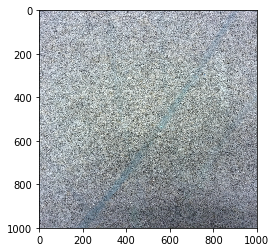

In [5]:
plt.imshow(grounds[0])

In [18]:
origin_pt = origin_pool[np.random.choice(len(origin_pool))] 
end_pt = end_pool[np.random.choice(len(end_pool))] 
radius = radius_pool[np.random.choice(len(radius_pool))] 
origin = Point(origin_pt[0], origin_pt[1])
end = Point(end_pt[0], end_pt[1])
cmd = int(compute_command_arc(origin, end, radius))

In [19]:
cmd

47

In [20]:
img = grounds[np.random.choice(range(3))]
img_drawn = draw_central_dashed_arc_on_ground(img, origin, end, radius, (148,252,9))
img_complete = draw_lateral_complete_arcs_on_ground(img_drawn, origin, end, radius, (255,255,255))
img_final = 255*np.ones((3*img.shape[0],4*img.shape[1],3), dtype='uint8')
img_final[2*img.shape[0]:, img.shape[1]:2*img.shape[1],:]=img_complete
plt.imsave('test.jpg',img_final)

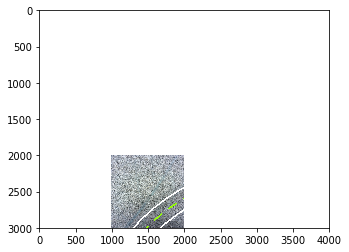

In [27]:
plt.imshow(img_final)

In [23]:
p = os.popen('povray -Ipovray_test_cob.pov.j2 Height=176 Width=240 Output_File_Name={}_cmd_{}'.format(int(cmd),0),"r")

In [24]:
!pwd

/Users/constant.bridon/Documents/IronCar/simulateur_octo/exploration


# Generation

In [15]:
i =0 
while True:
    origin_pt = origin_pool[np.random.choice(len(origin_pool))] 
    end_pt = end_pool[np.random.choice(len(end_pool))] 
    radius = radius_pool[np.random.choice(len(radius_pool))] 
    origin = Point(origin_pt[0], origin_pt[1])
    end = Point(end_pt[0], end_pt[1])
    cmd = int(compute_command_arc(origin, end, radius))
    print(cmd)
    if int(cmd) <= 36:
        img = grounds[np.random.choice(range(3))]
        img_drawn = draw_central_dashed_arc_on_ground(img, origin, end, radius, (148,252,9))
        img_complete = draw_lateral_complete_arcs_on_ground(img_drawn, origin, end, radius, (255,255,255))
        img_final = 255*np.ones((3*img.shape[0],4*img.shape[1],3), dtype='uint8')
        img_final[2*img.shape[0]:, img.shape[1]:2*img.shape[1],:]=img_complete
        plt.imsave('test.jpg',img_final)
        p = os.popen('povray -Ipovray_test_cob.pov.j2 Height=176 Width=240 Output_File_Name={}_cmd_{}'.format(int(cmd),i),"r")
        img_complete = cv2.flip(img_complete,1)
        img_final = 255*np.ones((3*img.shape[0],4*img.shape[1],3), dtype='uint8')
        img_final[2*img.shape[0]:, img.shape[1]:2*img.shape[1],:]=img_complete
        plt.imsave('test.jpg',img_final)
        p = os.popen('povray -Ipovray_test_cob.pov.j2 Height=176 Width=240 Output_File_Name={}_cmd_{}'.format(180 - int(cmd),i),"r")
        i+=1
        if i == images_curve:
            break


111
41
49
85
89
111
34
21
75
84
97
55
70
78
40
76
81
57
73
80
40
57
66
36
35
95
83
82
42
75
53
113
87
62
70
81
61
108
47
94
88
77
59
39
33
48
59
89
75
48
73
25
38
26
97
35
54
61
46
69
49
76
17
40
46
78
91
54
28
36
35
102
96
56
41
83
120
87
69
73
68
68
40
79
95
85
34
68
85
95
83
115
81
82
91
27
97
96
95
65
82
92
45
33
81
57
64
44
25
28
46
22
45
36
49
81
105
91
63
76
33
67
111
19
90
96
18
89
62
102
70
76
83
46
38
62
105
44
50
82
49
50
52
81
55
51
122
87
43
52
26
49
96
86
19
55
102
82
64
45
101
80
53
59
80
56
20
93
58
60
60
102
81
55
41
85
97
91
75
85
79
24
94
40
64
67
44
93
75
105
40
75
94
36
54
60
97
43
40
94
31
21
39
64
45
36
83
74
56
66
81
86
17
76
66
70
105
97
94
111
55
83
115
47
72
64
29
64
83
49
83
84
59
35
52
32
37
60
89
69
86
66
18
52
76
30
115
70
27
57
22
25
32
78
105
39
27
22
49
92
74
47
26
65
65
54
84
91
83
41
32
91
78
33
76
69
96
30
85
73
65
77
80
23
76
43
23
57
86
41
73
85
65
75
62
83
95
50
83
51
74
60
72
58
50
54
96
84
44
82
46
108
68
37
49
45
68
111
82
91
26
80
25
